ucat generates a catalog of galaxies using the ivy workflow engine. We are describing here how to use galsbi.ucat.

# Running pluings directly

The most straightforward way to create a galaxy catalog is by running the corresponding ucat plugin directly. First, we need to build the context of the simulation. We load the default values from the galsbi.ucat.config.common module and assign the correct file paths to others.

In [7]:
par = ctx.parameters

In [10]:
par.filters_full_names

{'B': 'SuprimeCam_B',
 'g': 'HSC_g',
 'r': 'HSC_r2',
 'i': 'HSC_i2',
 'z': 'HSC_z',
 'y': 'HSC_y'}

In [12]:
import ivy
import os
from cosmo_torrent import data_path

ctx = ivy.context.create_ctx(
    parameters=ivy.load_configs("galsbi.ucat.config.common")
)

# integrations tables, templates, filters and extinction files
ctx.parameters.template_file_name = os.path.join(data_path("template_BlantonRoweis07"), "template_spectra_BlantonRoweis07.h5")
ctx.parameters.filters_file_name = os.path.join(
    data_path("HSC_tables"), "HSC_filters_collection_yfix.h5"
)
ctx.parameters.templates_file_name = os.path.join(
    data_path("template_BlantonRoweis07"), "template_spectra_BlantonRoweis07.h5"
)
ctx.parameters.extinction_map_file_name = os.path.join(
    data_path("lambda_sfd_ebv"), "lambda_sfd_ebv.fits"
)
ctx.parameters.templates_int_tables_file_name = os.path.join(
    data_path("HSC_tables"), "HSC_template_integrals_yfix.h5"
)

ctx.parameters.filters_full_names["i"] = "SuprimeCam_IA679"

In [13]:
from galsbi.ucat.plugins import sample_galaxies

plugin = sample_galaxies.Plugin(ctx)
plugin()

[main]
model = LCDM
core_equations_files = ['/Users/silvanfischbacher/miniforge3/envs/galsbi-cpvn/lib/python3.12/site-packages/PyCosmo/CosmologyCore.py']
compilation_flags = -O3
default_ini_file = config/default_lcdm.ini

[equation_parameters]
l_max = 20
splits = None
reorder = True
cache hit at /Users/silvanfischbacher/Library/Cache/PyCosmo/macosx-11.0-arm64/2_2_0/2_2_4__9bfe33.pkl
load wrapper from /Users/silvanfischbacher/Library/Cache/sympy2c/macosx-11.0-arm64/2_2_4__np_1_26_4/1db8b055_fc3ec
Parameters updated
24-12-11 11:59:39 sample_gal INF   Sampling galaxies based on RA/DEC and pixel scale 


KeyError: "Unable to open object (object 'IA679' doesn't exist)"

The context contains now a galaxy catalog with parameters such as redshift or apparent magnitudes for different bands. Note that the hard cut in the i-band magnitude comes from the fact that a cut in the i-band is performed when sampling

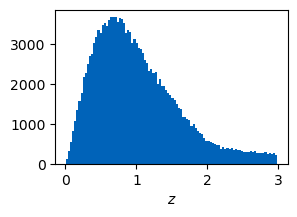

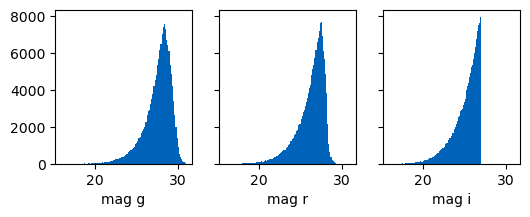

In [3]:
import matplotlib.pyplot as plt
from cosmic_toolbox.colors import set_cycle
set_cycle()

plt.figure(figsize=(3,2))
plt.hist(ctx.galaxies.z, bins=100)
plt.xlabel("$z$")
plt.show()

fig, axs = plt.subplots(1,3, figsize=(6,2), sharex=True, sharey=True)
axs[0].hist(ctx.galaxies.int_magnitude_dict["g"], bins=100)
axs[0].set_xlabel("mag g")
axs[1].hist(ctx.galaxies.int_magnitude_dict["r"], bins=100)
axs[1].set_xlabel("mag r")
axs[2].hist(ctx.galaxies.int_magnitude_dict["i"], bins=100)
axs[2].set_xlabel("mag i");

# Running from config files

## Basic example 

Especially if the pipelines become more complex, it might be easier to generate a config file and run this config file. The script from above would look like this if you setup a config file: basic_example_config.py

Running this config file is then done by using ivy.execute command. The resulting galaxy distribution is the same as above.

In [4]:
ctx = ivy.execute("basic_example_config")

plt.figure(figsize=(3,2))
plt.hist(ctx.galaxies.z, bins=100)
plt.xlabel("$z$")
plt.show()

fig, axs = plt.subplots(1,3, figsize=(6,2), sharex=True, sharey=True)
axs[0].hist(ctx.galaxies.int_magnitude_dict["g"], bins=100)
axs[0].set_xlabel("mag g")
axs[1].hist(ctx.galaxies.int_magnitude_dict["r"], bins=100)
axs[1].set_xlabel("mag r")
axs[2].hist(ctx.galaxies.int_magnitude_dict["i"], bins=100)
axs[2].set_xlabel("mag i");

ModuleNotFoundError: No module named 'ucat'

## Complex example

You can combine different plugins by adapting the config file. For plugins that are not working on all bands but on specific bands, you can use loops from ivy. This example samples galaxies based on the default values, applies shear to them and saves the catalogs for all bands. Example: complex_example_config.py

In [2]:
ctx = ivy.execute("complex_example_config")

<frozen importlib._bootstrap>:488: DeprecationWarning: Type google.protobuf.pyext._message.ScalarMapContainer uses PyType_Spec with a metaclass that has custom tp_new. This is deprecated and will no longer be allowed in Python 3.14.
<frozen importlib._bootstrap>:488: DeprecationWarning: Type google.protobuf.pyext._message.MessageMapContainer uses PyType_Spec with a metaclass that has custom tp_new. This is deprecated and will no longer be allowed in Python 3.14.
/Users/silvanfischbacher/miniforge3/envs/galsbi-cpvn/lib/python3.12/site-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


[main]
model = LCDM
core_equations_files = ['/Users/silvanfischbacher/miniforge3/envs/galsbi-cpvn/lib/python3.12/site-packages/PyCosmo/CosmologyCore.py']
compilation_flags = -O3
default_ini_file = config/default_lcdm.ini

[equation_parameters]
l_max = 20
splits = None
reorder = True
cache hit at /Users/silvanfischbacher/Library/Cache/PyCosmo/macosx-11.0-arm64/2_2_0/2_2_4__9bfe33.pkl
load wrapper from /Users/silvanfischbacher/Library/Cache/sympy2c/macosx-11.0-arm64/2_2_4__np_1_26_4/1db8b055_fc3ec
Parameters updated
24-10-08 16:36:36 sample_gal INF   Sampling galaxies based on RA/DEC and pixel scale 


/Users/silvanfischbacher/repos/ucat/src/ucat/galaxy_sampling_util.py:150: UserWarning: par.lum_fct_m_max is too low according to z-m-interpolation, some galaxies may be missing
 gals_mag_max=27.00 lum_fct_z_max=3.00 m_max_sample=1.10 lum_fct_m_max=-5.00
  warnings.warn(msg)


24-10-08 16:36:38 sample_gal INF   lumfun=red n_gals=13222 maximum number of galaxies reached=False (inf) 
24-10-08 16:36:47 sample_gal INF   lumfun=blue n_gals=144472 maximum number of galaxies reached=False (inf) 
24-10-08 16:36:47 sample_gal INF   galaxy counts n_total=157694 mem_mb_current=1348.5 
[main]
model = LCDM
core_equations_files = ['/Users/silvanfischbacher/miniforge3/envs/galsbi-cpvn/lib/python3.12/site-packages/PyCosmo/CosmologyCore.py']
compilation_flags = -O3
default_ini_file = config/default_lcdm.ini

[equation_parameters]
l_max = 20
splits = None
reorder = True
cache hit at /Users/silvanfischbacher/Library/Cache/PyCosmo/macosx-11.0-arm64/2_2_0/2_2_4__9bfe33.pkl
load wrapper from /Users/silvanfischbacher/Library/Cache/sympy2c/macosx-11.0-arm64/2_2_4__np_1_26_4/1db8b055_fc3ec
Parameters updated
24-10-08 16:36:49 apply_shea INF   applying shear and magnification 
== Ivy run took:  20.249 s ===
sample gal population         :  19.216s
apply shear                   :   0.

This creates two catalogs, one with intrinsic properties of the galaxies (e.g. position, shape, size) and one with the photometric properties (magnitudes in different bands)

In [6]:
from cosmic_toolbox import arraytools as at
cat_photo = at.load_hdf_cols("ucat_photo.h5")
print(f"parameters of the photometric catalog: {cat_photo.dtype.names}")
cat_int = at.load_hdf("ucat_galaxies.h5")
print(f"parameters of the intrinsic catalog: {cat_int.dtype.names}")

24-09-04 16:35:10 arraytools INF   loaded ucat_photo.h5 with n_rows=157694 
parameters of the photometric catalog: ('abs_mag_g', 'abs_mag_i', 'abs_mag_r', 'abs_mag_y', 'abs_mag_z', 'galaxy_type', 'int_mag_g', 'int_mag_i', 'int_mag_r', 'int_mag_y', 'int_mag_z', 'mag_g', 'mag_i', 'mag_r', 'mag_y', 'mag_z', 'template_coeffs', 'template_coeffs_abs', 'z')
parameters of the intrinsic catalog: ('id', 'z', 'template_coeffs', 'template_coeffs_abs', 'abs_mag_lumfun', 'galaxy_type', 'excess_b_v', 'x', 'y', 'sersic_n', 'int_r50', 'int_e1', 'int_e2', 'gamma1', 'gamma2', 'kappa', 'e1', 'e2', 'r50')


# Adapting ucat to your workflow

The easiest way to adapt ucat to your workflow is by using a customized config file. Check out all the different parameters and their discription in galsbi.ucat.config.common. If you require new features, writing a new plugin is straightforward. A template plugin is shown below

In [7]:
from ivy.plugin.base_plugin import BasePlugin

class Plugin(BasePlugin):
    def __call__(self):

        # accessing all parameters from the config by calling the context
        par = self.ctx.parameters

        # implement new functionality


    def __str__(self):
        return "new plugin doing something"

If you want to use the generated galaxy catalog to create a simulated image, you can combine your config file with plugins from ufig, for this see the documentation of ufig.

To use a galaxy population model that is constrained by data, you can use the galsbi interface. It is possible to to use your custom config files within the galsbi module but still using the parameters of one of the galaxy population model. For more information of how to use ucat with galsbi see the documentation of galsbi.